In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 58.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 52.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/train.csv')

In [5]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,rt _hockey: it’s gold gbr rio2016 hockey @_gbh…,0.000,0.000,Neutral
1,1,amazing! congratulations winning modernpentath...,0.825,0.625,Positive
2,2,wait. ashton eaton won decathlon gold again? yas!,0.000,0.000,Neutral
3,3,got shivers watching end chloe esposito's race...,0.000,0.000,Neutral
4,4,celebrating gold! effort! congratulations! 👍💪🏅,0.000,0.000,Neutral


In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/test.csv')

In [7]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,75000,add bitcoins goldira investingold buyinggold j...,0.0,0.0,Neutral
1,75001,"focus sports, goldira investingold buyinggold ...",0.0,0.0,Neutral
2,75002,'we're dreading going home goldira investingol...,0.0,0.0,Neutral
3,75003,cast silver bar ira rrsp acceptable. goldira i...,0.0,0.0,Neutral
4,75004,monetary works goldira investingold buyinggold...,0.0,0.0,Neutral


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [9]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [10]:
# Building model with transformer
model_name = 'google/electra-small-discriminator'

trans = text.Transformer(model_name, maxlen=128)

In [11]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 18


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 21


In [12]:
# getting electra-base model.
model = trans.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [ ]:
history = learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
4688/4688 [==============================] - 3159s 665ms/step - loss: 0.1994 - accuracy: 0.9313 - val_loss: 0.3258 - val_accuracy: 0.8984
Epoch 2/5
4688/4688 [==============================] - 3142s 667ms/step - loss: 0.0346 - accuracy: 0.9911 - val_loss: 0.1336 - val_accuracy: 0.9698
Epoch 3/5
4688/4688 [==============================] - 3122s 663ms/step - loss: 0.0276 - accuracy: 0.9929 - val_loss: 0.0826 - val_accuracy: 0.9757
Epoch 4/5
4688/4688 [==============================] - 3123s 663ms/step - loss: 0.0137 - accuracy: 0.9968 - val_loss: 0.1356 - val_accuracy: 0.9427
Epoch 5/5
4688/4688 [==============================] - 3010s 639ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.1714 - val_accuracy: 0.9157


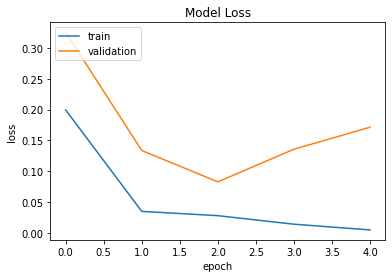

In [ ]:
learner.plot('loss')

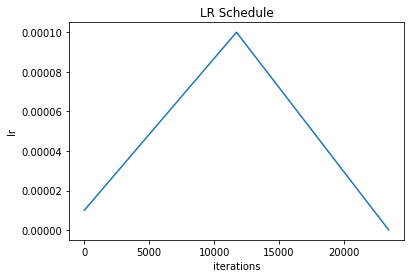

In [ ]:
learner.plot('lr')

In [ ]:
learner.validate()

242/242 [==============================] - 72s 283ms/step
              precision    recall  f1-score   support

           0       1.00      0.27      0.43       757
           1       0.87      0.99      0.93      4099
           2       0.98      0.98      0.98      2880

    accuracy                           0.92      7736
   macro avg       0.95      0.75      0.78      7736
weighted avg       0.92      0.92      0.90      7736



array([[ 207,  540,   10],
       [   0, 4042,   57],
       [   0,   45, 2835]])